In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from surprise import Reader, Dataset, SVD
from surprise.model_selection import KFold
from surprise.model_selection.validation import cross_validate

#  Reading all the datasets


In [2]:
meta = pd.read_csv('movies_metadata.csv')
meta.head()

C:\Users\kesha\AppData\Local\Temp\ipykernel_8176\2903413914.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  meta = pd.read_csv('movies_metadata.csv')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [3]:
ratings = pd.read_csv('ratings_small.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [4]:
links = pd.read_csv('links_small.csv')
links.head(6)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
5,6,113277,949.0


In [5]:
keywords = pd.read_csv('keywords.csv')
keywords.head(5)

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [6]:
credits = pd.read_csv('credits.csv')
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


# Observing meta.csv

In [7]:
meta.shape

(45466, 24)

In [8]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

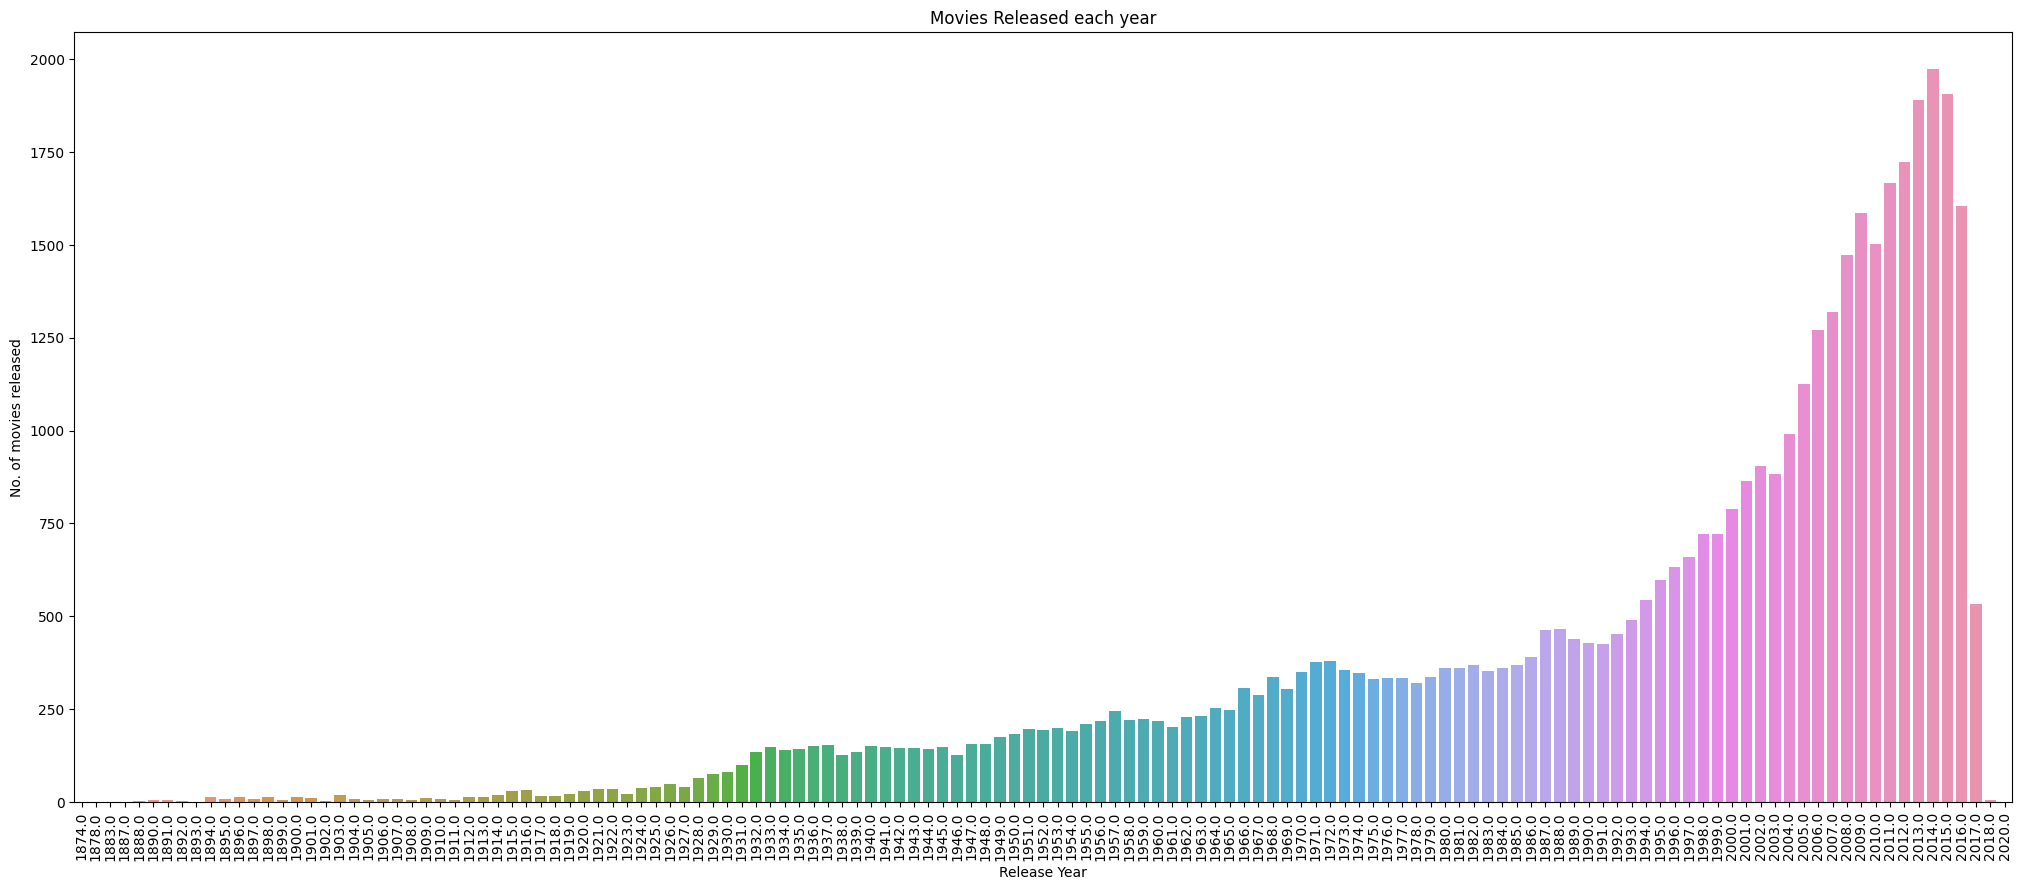

In [10]:
#Movies Released each year
meta['release_datee'] = pd.to_datetime(meta['release_date'],errors='coerce')
year_name = meta['release_datee'].dt.year.value_counts().index.tolist()
year_count = meta['release_datee'].dt.year.value_counts().tolist()

fig = plt.figure(figsize = (25, 10))
sns.barplot(x=year_name,y=year_count)
plt.xticks(rotation=90)
plt.xlabel('Release Year')
plt.ylabel('No. of movies released')
plt.title('Movies Released each year')
plt.show()

In [11]:
meta.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'release_datee'],
      dtype='object')

In [12]:
meta = meta.drop('release_datee', axis = 1)

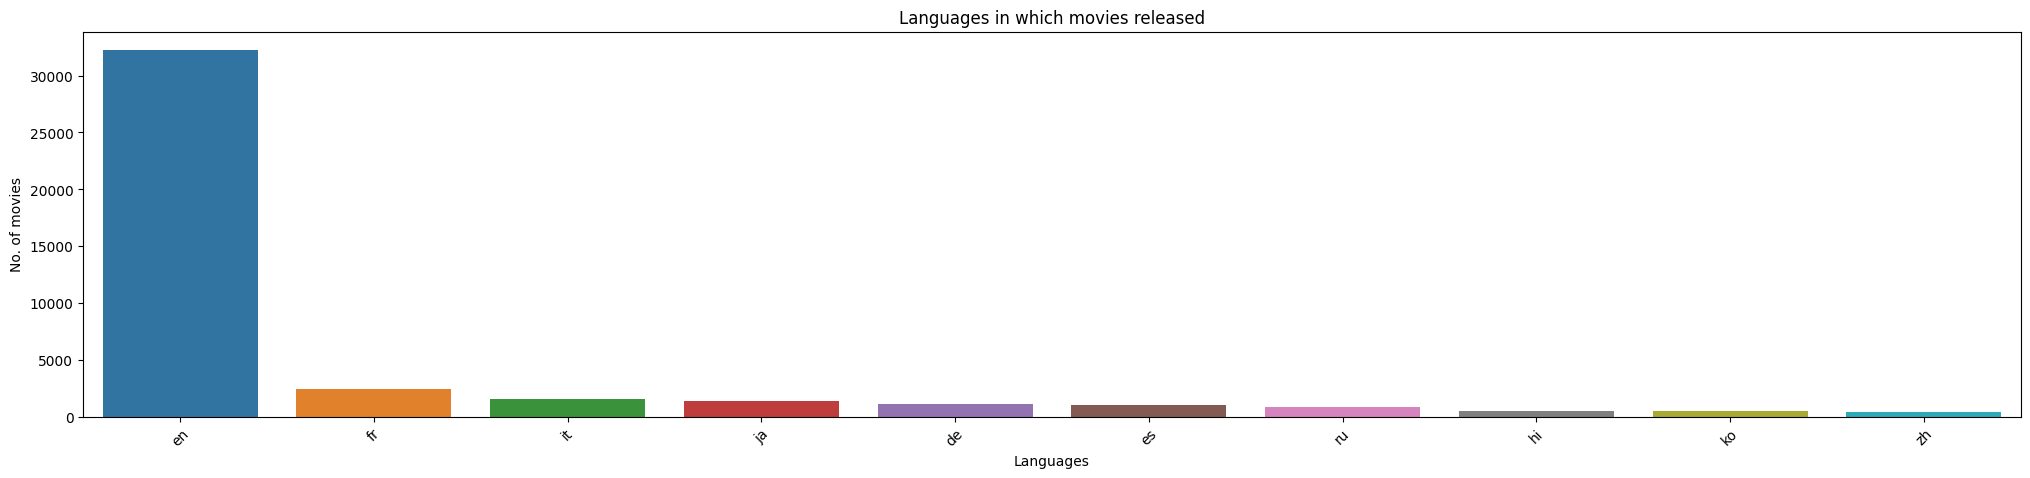

In [13]:
#number of movies made in different original language
lang_name = meta['original_language'].value_counts().index.tolist()[0:10]
lang_count = meta['original_language'].value_counts().tolist()[0:10]

fig = plt.figure(figsize = (25, 5))
sns.barplot(x=lang_name,y=lang_count)
plt.xticks(rotation=45)
plt.xlabel('Languages')
plt.ylabel('No. of movies')
plt.title('Languages in which movies released')
plt.show()

In [14]:
meta = meta.drop([19730, 29503, 35587]) # Removing these ids to solve ValueError: "Unable to parse string..."


meta['id'] = pd.to_numeric(meta['id'])

In [15]:
pd.DataFrame({'feature':links.dtypes.index, 'dtype':links.dtypes.values})

,feature,dtype
0,movieId,int64
1,imdbId,int64
2,tmdbId,float64


In [16]:
col=np.array(links['tmdbId'], np.int64)
links['tmdbId']=col

In [17]:
#merging the meta and links data on tmdbid
meta.rename(columns={'id':'tmdbId'}, inplace=True)
meta = pd.merge(meta,links,on='tmdbId')
meta.drop(['imdb_id'], axis=1, inplace=True)
meta.head()

,adult,belongs_to_collection,budget,genres,homepage,tmdbId,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,movieId,imdbId
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1,114709
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,2,113497
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,...,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,3,113228
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,...,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,4,114885
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,5,113041


# Content Based Filtering
1- preprocessing

In [20]:
meta.head()
meta.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'tmdbId', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'movieId', 'imdbId'],
      dtype='object')

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

#removin stopwords
tfidf = TfidfVectorizer(stop_words='english')


meta['overview'] = meta['overview'].fillna('')

#Constructing the required TF-IDF matrix by fitting and transforming our data
tfidf_matrix = tfidf.fit_transform(meta['overview'])


tfidf_matrix.shape

(9099, 29727)

In [21]:
from sklearn.metrics.pairwise import linear_kernel

# cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

cosine_sim

array([[1.        , 0.01801424, 0.        , ..., 0.        , 0.        ,
        0.01172966],
       [0.01801424, 1.        , 0.04893243, ..., 0.        , 0.00617224,
        0.01162237],
       [0.        , 0.04893243, 1.        , ..., 0.        , 0.00772206,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.00617224, 0.00772206, ..., 0.        , 1.        ,
        0.00489843],
       [0.01172966, 0.01162237, 0.        , ..., 0.        , 0.00489843,
        1.        ]])

In [23]:
indices = pd.Series(meta.index, index=meta['title']).drop_duplicates()

In [24]:
def get_recommendations(title, cosine_sim=cosine_sim):
    # index of the movie that matches the title
    idx = indices[title]
    # pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Gettin the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most simila movies
    return meta['title'].iloc[movie_indices]

In [25]:
get_recommendations('Toy Story')

7545               Toy Story 3
2504               Toy Story 2
6201    The 40 Year Old Virgin
892      Rebel Without a Cause
6563    For Your Consideration
2549           Man on the Moon
437                     Malice
1601                 Condorman
6636              Factory Girl
4995          Rivers and Tides
Name: title, dtype: object

In [26]:
get_recommendations('Father of the Bride Part II')

4885      Father of the Bride
5077       The Out of Towners
772     It's a Wonderful Life
7164             Funny People
8674          Love Is Strange
6192                  Junebug
1259     George of the Jungle
3374                     Blow
7395             A Single Man
6509            Hollywoodland
Name: title, dtype: object

# recommendation based on people associated and keywords

In [27]:
data2 = pd.merge(credits, keywords, on = 'id')

In [28]:
data2.head()

,cast,crew,id,keywords
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [29]:
data2.rename(columns={'tmdbiId': 'tmdbId'}, inplace=True)

In [30]:
data2.head()

,cast,crew,id,keywords
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [31]:
data2.columns

Index(['cast', 'crew', 'id', 'keywords'], dtype='object')

In [32]:
meta['tmdbId'].rename('id', inplace = True)

0          862
1         8844
2        15602
3        31357
4        11862
         ...  
9094    159550
9095    392572
9096    402672
9097    315011
9098    391698
Name: id, Length: 9099, dtype: int64

In [33]:
meta.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'tmdbId', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'movieId', 'imdbId'],
      dtype='object')

In [34]:
meta['id'] = meta['tmdbId']

In [35]:
data3 = pd.merge(meta, data2, on = 'id')

In [36]:
data3.head()

,adult,belongs_to_collection,budget,genres,homepage,tmdbId,original_language,original_title,overview,popularity,...,title,video,vote_average,vote_count,movieId,imdbId,id,cast,crew,keywords
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,Toy Story,False,7.7,5415.0,1,114709,862,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,...,Jumanji,False,6.9,2413.0,2,113497,8844,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,...,Grumpier Old Men,False,6.5,92.0,3,113228,15602,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,...,Waiting to Exhale,False,6.1,34.0,4,114885,31357,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,...,Father of the Bride Part II,False,5.7,173.0,5,113041,11862,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [37]:
data3.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'tmdbId', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'movieId', 'imdbId', 'id', 'cast', 'crew',
       'keywords'],
      dtype='object')

In [38]:
from ast import literal_eval

columns_to_parse = ['cast', 'crew', 'keywords', 'genres']
for column in columns_to_parse:
    data3[column] = data3[column].apply(lambda x: literal_eval(x) if isinstance(x, str) else x)

In [39]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [40]:
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        
        if len(names) > 3:
            names = names[:3]
        return names

   
    return []

In [44]:
#cleaning and preprocessing data
def preprocess_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [45]:
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    data3[feature] = data3[feature].apply(preprocess_data)

In [46]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
data3['soup'] = data3.apply(create_soup, axis=1)

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(data3['soup'])

In [48]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

# using the same function used for content based filtering to get prdiction but using different metrics

In [49]:
get_recommendations('The Dark Knight Rises', cosine_sim2)

515                          Princess Caraboo
5164                                Carandiru
268                                 Quiz Show
5900                                   Spiral
8834                         Midnight Special
1074                         April Fool's Day
1463                        Can't Hardly Wait
1761    The Lodger: A Story of the London Fog
2830         What Ever Happened to Baby Jane?
3003                                   Asylum
Name: title, dtype: object

In [50]:
get_recommendations('Toy Story', cosine_sim2)

2522                                    Three Ages
7629            You Will Meet a Tall Dark Stranger
8519                                      Non-Stop
2751                               The Good Mother
6534    The Texas Chainsaw Massacre: The Beginning
7914                                    The Double
7254                    Ghosts of Girlfriends Past
7871                                     Red State
1432                                Kissing a Fool
4341                                   Raggedy Man
Name: title, dtype: object

# Recommendation based on userId and movie choice

In [51]:
reader = Reader() # Used to parse a file containing ratings
df = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
kf = KFold(n_splits=5)
kf.split(df) # Split the data into folds

<generator object KFold.split at 0x000001778558D740>

In [52]:
svd = SVD()
cross_validate(svd, df, measures=['RMSE', 'MAE'])

trainset = df.build_full_trainset()
svd.fit(trainset)

In [53]:
ratings[ratings['userId'] == 9]

,userId,movieId,rating,timestamp
699,9,1,4.0,938629179
700,9,17,4.0,938628337
701,9,26,3.0,938628655
702,9,36,5.0,938629110
703,9,47,3.0,938628897
704,9,318,4.0,938628966
705,9,497,4.0,938628777
706,9,515,4.0,938628577
707,9,527,5.0,938628843
708,9,534,5.0,938628337


In [54]:
links_df = pd.read_csv('links_small.csv')
col=np.array(links_df['tmdbId'], np.int64)
links_df['tmdbId']=col

# Merge movies_metadata.csv and links_small.csv files
links_df = links_df.merge(meta[['title', 'tmdbId']], on='tmdbId').set_index('title')
links_index = links_df.set_index('tmdbId') 

In [55]:
def hybrid_rec(userId, title):
    idx = indices[title]
    tmdbId = links_df.loc[title]['tmdbId'] 
    
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31] # Scores of the 30 most similar movies
    movie_indices = [i[0] for i in sim_scores]
    
    movies = meta.iloc[movie_indices][['title', 'vote_average', 'tmdbId']]
    movies['est'] = movies['tmdbId'].apply(lambda x: svd.predict(userId, links_index.loc[x]['movieId']).est) # Estimated prediction using svd
    movies = movies.sort_values('est', ascending=False) # Rank movies according to the predicted values
    movies.columns = ['Title', 'Vote Average', 'TMDb Id', 'Estimated Prediction']
    return movies.head(7)

In [56]:
hybrid_rec(727, 'The Conjuring')

,Title,Vote Average,TMDb Id,Estimated Prediction
7795,Midnight in Paris,7.4,59436,4.148573
9074,The Conjuring 2,7.0,259693,3.666477
5364,Night of the Living Dead,6.7,19185,3.664808
1965,The Texas Chain Saw Massacre,7.1,30497,3.656580
3784,Things Behind the Sun,5.9,102933,3.628824
6863,[REC],7.1,8329,3.612857
5859,Shining Through,6.2,31962,3.602246


In [57]:
hybrid_rec(1, 'The Conjuring')

,Title,Vote Average,TMDb Id,Estimated Prediction
7795,Midnight in Paris,7.4,59436,3.407144
8389,Koch,5.0,138217,2.790983
6863,[REC],7.1,8329,2.787070
6100,Electra Glide in Blue,6.6,26332,2.781542
5859,Shining Through,6.2,31962,2.780463
8726,The Borderlands,5.1,207774,2.775175
9074,The Conjuring 2,7.0,259693,2.722791


In [58]:
hybrid_rec(5, 'Iron Man')

,Title,Vote Average,TMDb Id,Estimated Prediction
6152,Batman Begins,7.5,272,4.436788
1001,Touch of Evil,7.6,1480,4.398563
8766,Avengers: Age of Ultron,7.3,99861,4.280177
892,Rebel Without a Cause,7.6,221,4.277451
7516,Iron Man 2,6.6,10138,4.101085
5057,Dr. Jekyll and Mr. Hyde,6.6,3022,4.048047
673,Ransom,6.4,3595,4.044686


In [59]:
import matplotlib.pyplot as plt

recommendations = get_recommendations('Toy Story', cosine_sim2)

# Create a simple list visualization of the recommendations
def create_recommendations_image(recommendations):
    plt.figure(figsize=(10, 6))
    plt.title('Recommended Movies')
    for i, movie in enumerate(recommendations[:10]):  # Display the top 10 recommendations
        plt.text(0.1, 0.9 - i * 0.05, f"{i+1}. {movie}", fontsize=12)

    plt.axis('off')  # Hide the axis
    plt.savefig('recommendations.png', bbox_inches='tight', pad_inches=0.1, dpi=300)
    plt.show()

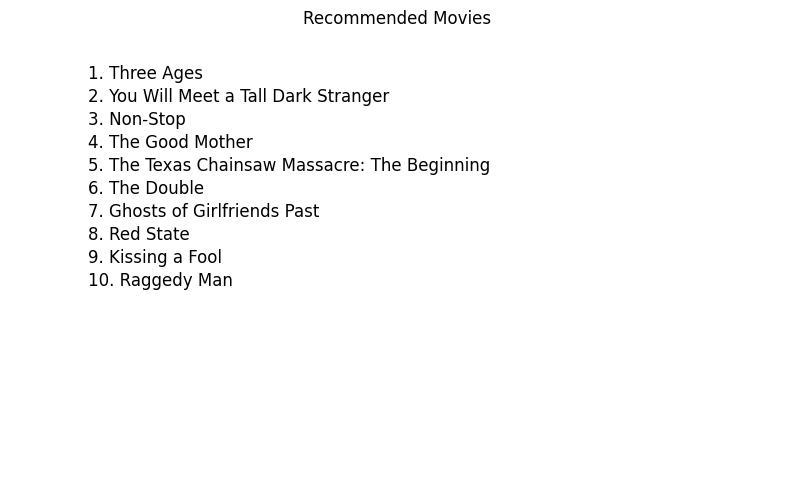

In [60]:
create_recommendations_image(recommendations)

In [61]:
recommendations2 = get_recommendations('The Dark Knight Rises', cosine_sim2)

# Create a simple list visualization of the recommendations
def create_recommendations_image(recommendations):
    plt.figure(figsize=(10, 6))
    plt.title('Recommended Movies')
    for i, movie in enumerate(recommendations2[:10]):  
        plt.text(0.1, 0.9 - i * 0.05, f"{i+1}. {movie}", fontsize=12)

    plt.axis('off')  # Hide the axis
    plt.savefig('recommendations2.png', bbox_inches='tight', pad_inches=0.1, dpi=300)
    plt.show()

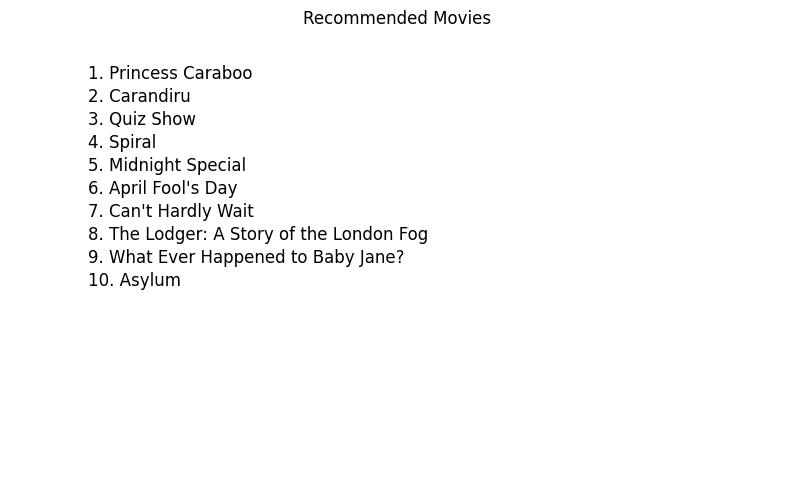

In [62]:
create_recommendations_image(recommendations2)

In [63]:
recommendation3 = hybrid_rec(1, 'The Conjuring')
def create_recommendations_image(recommendations):
    plt.figure(figsize=(10, 6))
    plt.title('Recommended Movies')
    for i, movie in enumerate(recommendation3[:7]):  
        plt.text(0.1, 0.9 - i * 0.05, f"{i+1}. {movie}", fontsize=12)

    plt.axis('off')  # Hide the axis
    plt.savefig('recommendations3.png', bbox_inches='tight', pad_inches=0.1, dpi=300)
    plt.show()

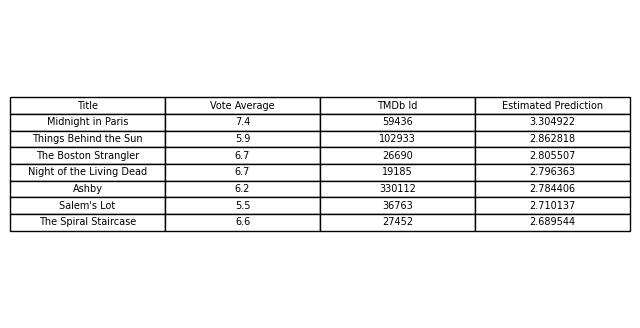

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with your data
data = {
    'Title': ["Midnight in Paris", "Things Behind the Sun", "The Boston Strangler", "Night of the Living Dead", "Ashby", "Salem's Lot", "The Spiral Staircase"],
    'Vote Average': [7.4, 5.9, 6.7, 6.7, 6.2, 5.5, 6.6],
    'TMDb Id': [59436, 102933, 26690, 19185, 330112, 36763, 27452],
    'Estimated Prediction': [3.304922, 2.862818, 2.805507, 2.796363, 2.784406, 2.710137, 2.689544]
}

recommendations_df = pd.DataFrame(data)

# Create a table visualization
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=recommendations_df.values, colLabels=recommendations_df.columns, cellLoc='center', loc='center')

# Save the table as an image
plt.savefig('recommendations_table.png', bbox_inches='tight', pad_inches=0.1, dpi=300)


In [65]:
# Import necessary modules
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

# Step 2: Create a Reader object to define the rating scale
reader = Reader(rating_scale=(0.5, 5.0))

# Step 3: Load your DataFrame into a Dataset object
df = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# Step 4: Split the dataset into training and test sets
trainset, testset = train_test_split(df, test_size=0.2)

# Step 5: Initialize and train the SVD model
svd = SVD()
svd.fit(trainset)

# Step 6: Make predictions on the test set
predictions = svd.test(testset)

# Step 7: Calculate RMSE
rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse}")


RMSE: 0.8968
RMSE: 0.896770643256901
